In [1]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')

In [5]:
df = pd.read_csv('C:\Programming\Data\StackOverFlowData2023\survey_results_public.csv' , index_col='ResponseId')
# df = pd.read_csv('/Users/sinaghadimi/Documents/Programming/Data/StackOverFlowData2023/survey_results_public.csv' , index_col='ResponseId')
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 85)


In [5]:
country_grp = df.groupby(['Country'])

In [6]:
America = country_grp.get_group('United States of America').copy()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


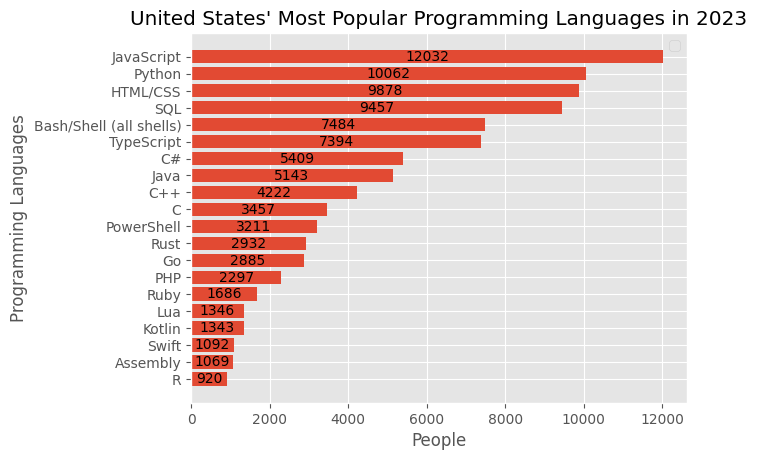

In [7]:
Languages = America['LanguageHaveWorkedWith'].fillna('')
lang_count = Counter()
for i in Languages:
    lang_count.update(i.split(';'))
prog_lang =[]
people_count=[]
for data in lang_count.most_common(20):
    prog_lang.append(data[0])
    people_count.append(data[1])
fig, pop_lang = plt.subplots()
reverse_prog = list(reversed(prog_lang))
reverse_people_count = list(reversed(people_count))
pop_lang.set_title('United States\' Most Popular Programming Languages in 2023')
bar = pop_lang.barh(reverse_prog, reverse_people_count)
pop_lang.bar_label(bar, label_type='center')
pop_lang.set_xlabel('People')
pop_lang.set_ylabel('Programming Languages')
plt.legend()
plt.show()
    

In [8]:
filt_under_18 = ((America['Age'] == 'Under 18 years old') & (America['CompTotal'] > 1000))
filt_18_24 = ((America['Age'] == '18-24 years old') & ((America['CompTotal'] > 1000) & (America['CompTotal'] < 1_000_000)))
filt_25_34 = ((America['Age'] == '25-34 years old') & ((America['CompTotal'] > 1000) & (America['CompTotal'] < 1_000_000)))
filt_35_44 = ((America['Age'] == '35-44 years old') & ((America['CompTotal'] > 1000) & (America['CompTotal'] < 1_000_000)))
filt_55_64 = ((America['Age'] == '55-64 years old') & ((America['CompTotal'] > 1000) & (America['CompTotal'] < 1_000_000)))


In [9]:
def graph_by_age(filt, title):
    fig, graph =plt.subplots()
    y_value = America.loc[filt,'CompTotal'].agg(['max','min','median','mean','std'],numeric_only=True)
    x_value = ['max','min','median','mean','std']
    bar = graph.bar(x_value,y_value)
    graph.set_title(title)
    graph.bar_label(bar, fmt='${:,.2f}')
    graph.set_xlabel('Basic Information')
    graph.set_ylabel('Salary')
    plt.legend()
    plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


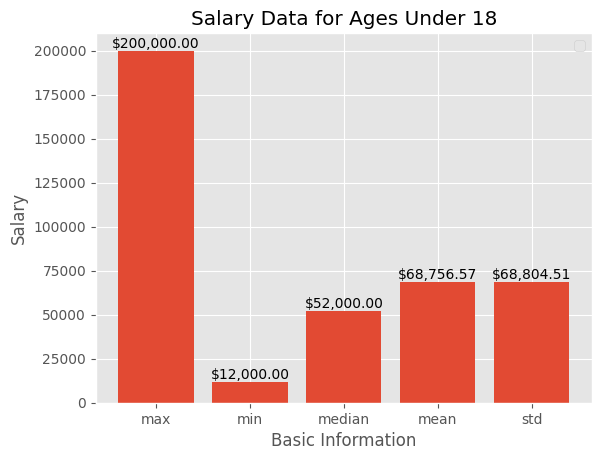

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


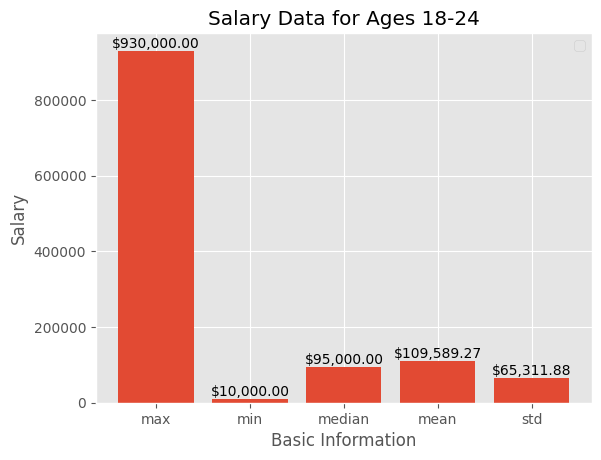

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


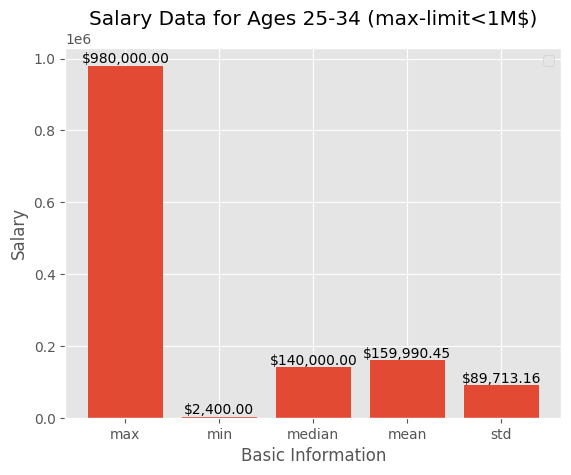

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


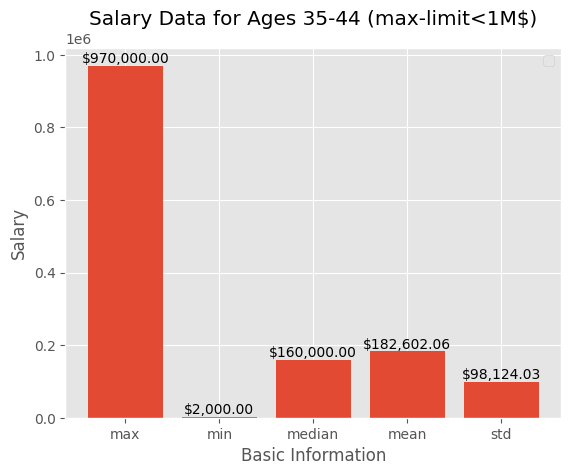

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


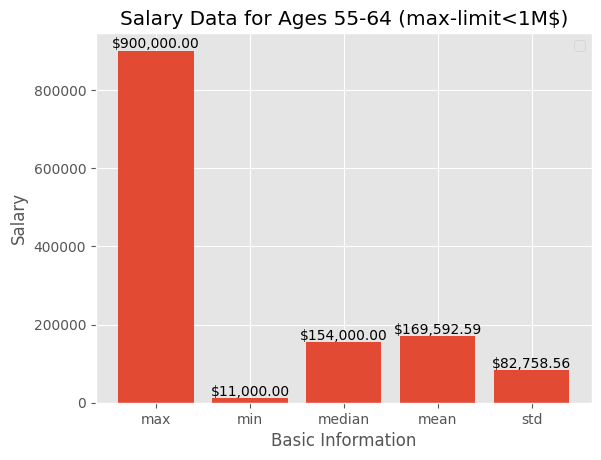

In [10]:
graph_by_age(filt_under_18, 'Salary Data for Ages Under 18')
graph_by_age(filt_18_24, 'Salary Data for Ages 18-24')
graph_by_age(filt_25_34, 'Salary Data for Ages 25-34 (max-limit<1M$)')
graph_by_age(filt_35_44, 'Salary Data for Ages 35-44 (max-limit<1M$)')
graph_by_age(filt_55_64, 'Salary Data for Ages 55-64 (max-limit<1M$)')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


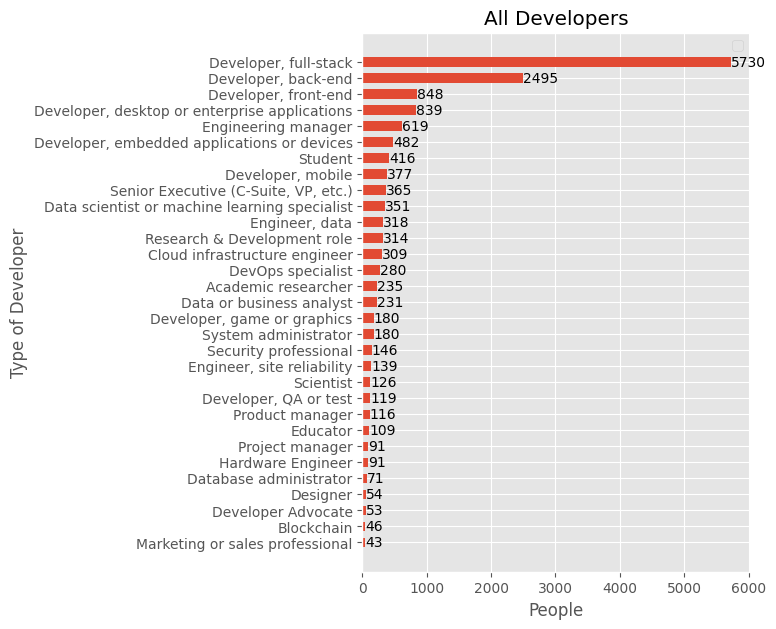

In [11]:
fig, devtype_graph =plt.subplots(figsize=(5,7))
America['DevType'].replace(['nan', 'Developer Experience','Other (please specify):'],np.nan,inplace=True)
df_devtype = America['DevType'].dropna().value_counts()
y_value_dev = list(reversed(df_devtype.index))
x_value_dev= list(reversed(df_devtype))
bar = devtype_graph.barh(y_value_dev,x_value_dev, height=0.6)
devtype_graph.set_title('All Developers')
devtype_graph.bar_label(bar)
devtype_graph.set_xlabel('People')
devtype_graph.set_ylabel('Type of Developer')
plt.legend()
plt.show()  

In [12]:

Devs = America.groupby('DevType')

In [13]:
Data_science = pd.concat([Devs.get_group('Data or business analyst'),
                          Devs.get_group('Engineer, data'), 
                          Devs.get_group('Data scientist or machine learning specialist')])

In [14]:
Software_engr = pd.concat([Devs.get_group('Developer, back-end'),
                          Devs.get_group('Developer, front-end'), 
                          Devs.get_group('Developer, full-stack'),
                          Devs.get_group('Developer, desktop or enterprise applications'),
                          Devs.get_group('Developer, QA or test'),
                          Devs.get_group('Developer, mobile'),
                          Devs.get_group('Developer, game or graphics'),
                          Devs.get_group('DevOps specialist')] )

In [15]:
Management = pd.concat([Devs.get_group('Senior Executive (C-Suite, VP, etc.)'),
                        Devs.get_group('Engineering manager'),
                        Devs.get_group('Project manager'),
                        Devs.get_group('Product manager'),
                        Devs.get_group('Research & Development role')])

In [16]:
Information_Technology = pd.concat([Devs.get_group('System administrator'),
                                    Devs.get_group('Database administrator'),
                                    Devs.get_group('Cloud infrastructure engineer'),
                                    Devs.get_group('Security professional'),
                                    Devs.get_group('Engineer, site reliability'),])

In [17]:
Electrical_engr = pd.concat([Devs.get_group('Hardware Engineer'),
                             Devs.get_group('Developer, embedded applications or devices')])

In [18]:
Academic = pd.concat([Devs.get_group('Academic researcher'),
                      Devs.get_group('Student'),
                      Devs.get_group('Educator'),
                      Devs.get_group('Scientist'),]) 

In [19]:
filt_data_science = ((Data_science['CompTotal'] > 1000) & (Data_science['CompTotal'] <1_000_000))
filt_software_engr = ((Software_engr['CompTotal'] > 1000) & (Software_engr['CompTotal'] < 1_000_000))
filt_management = ((Management['CompTotal'] > 1000) & (Management['CompTotal'] < 5_000_000))
filt_IT = ((Information_Technology['CompTotal'] > 1000) & (Information_Technology['CompTotal'] < 1_000_000))
filt_electrical = ((Electrical_engr['CompTotal'] > 1000) & (Electrical_engr['CompTotal'] < 1_000_000))
filt_Academic = ((Academic['CompTotal'] > 1000) & (Academic['CompTotal'] < 1_000_000))

In [20]:
def graph_by_career(group,filt, title):
    fig, graph =plt.subplots()
    y_value = group.loc[filt,'CompTotal'].agg(['max','min','median','mean','std'],numeric_only=True)
    x_value = ['max','min','median','mean','std']
    bar = graph.bar(x_value,y_value)
    graph.set_title(title)
    graph.bar_label(bar, fmt='${:,.2f}')
    graph.set_xlabel('Basic Information')
    graph.set_ylabel('Salary')
    plt.legend()
    plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


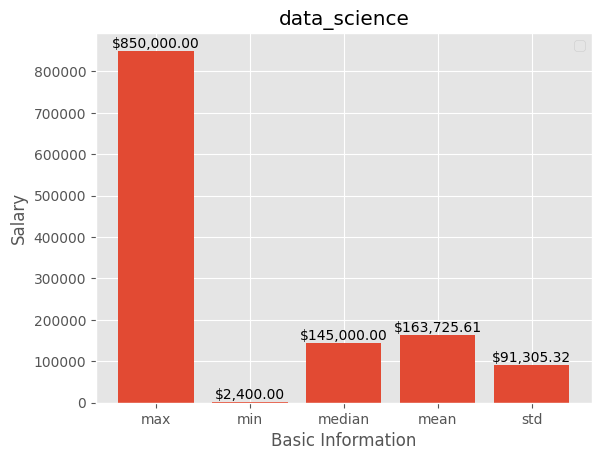

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


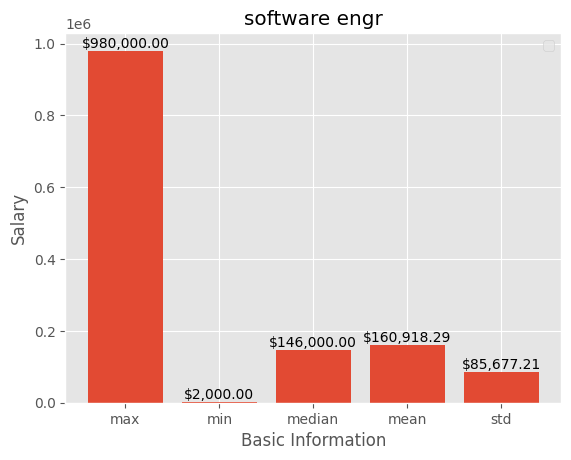

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


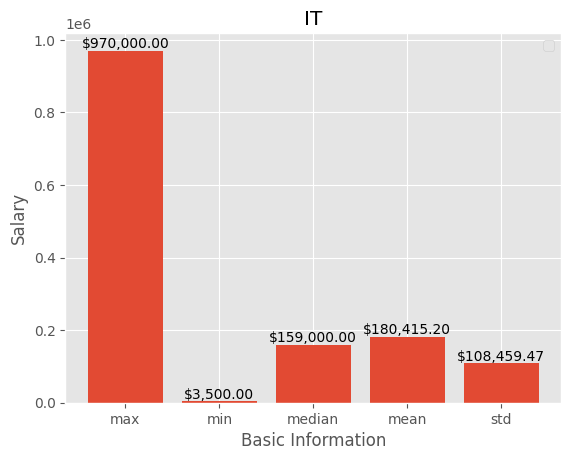

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


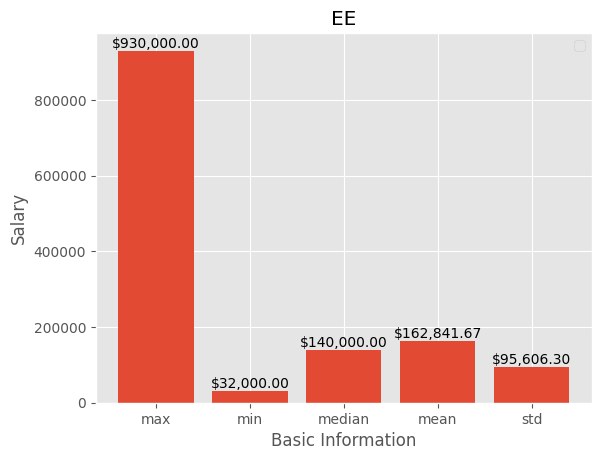

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


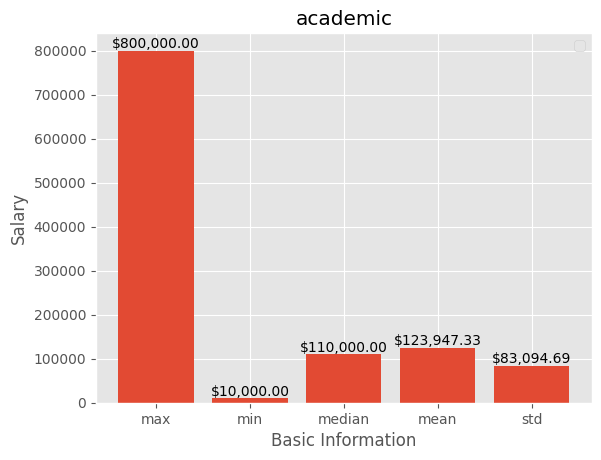

In [21]:
graph_by_career(Data_science ,filt_data_science, 'data_science')
graph_by_career(Software_engr ,filt_software_engr, 'software engr')
graph_by_career(Information_Technology ,filt_IT, 'IT')
graph_by_career(Electrical_engr ,filt_electrical, 'EE')
graph_by_career(Academic ,filt_Academic, 'academic')

In [22]:
def lang_careers(group,careerName):
    Languages = group['LanguageHaveWorkedWith'].fillna('')
    lang_count = Counter()
    for i in Languages:
        lang_count.update(i.split(';'))
    prog_lang =[]
    people_count=[]
    for data in lang_count.most_common(20):
        prog_lang.append(data[0])
        people_count.append(data[1])
    fig, pop_lang = plt.subplots()
    reverse_prog = list(reversed(prog_lang))
    reverse_people_count = list(reversed(people_count))
    job_name = ('Most common Languages in ' + careerName)
    pop_lang.set_title(job_name)
    bar = pop_lang.barh(reverse_prog, reverse_people_count)
    pop_lang.bar_label(bar, label_type='center')
    pop_lang.set_xlabel('People')
    pop_lang.set_ylabel('Programming Languages')
    plt.legend()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


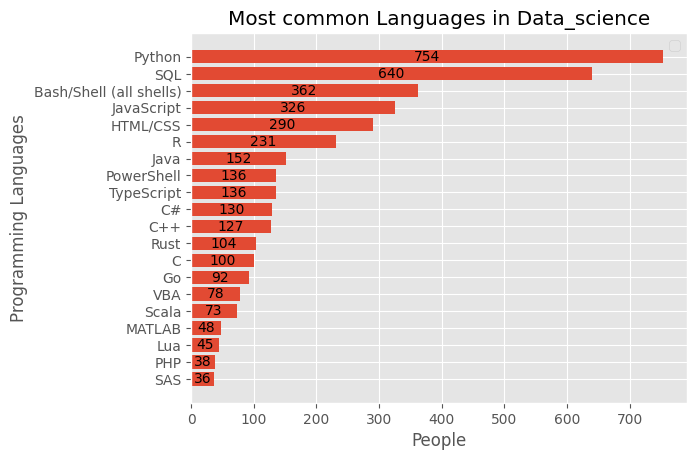

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


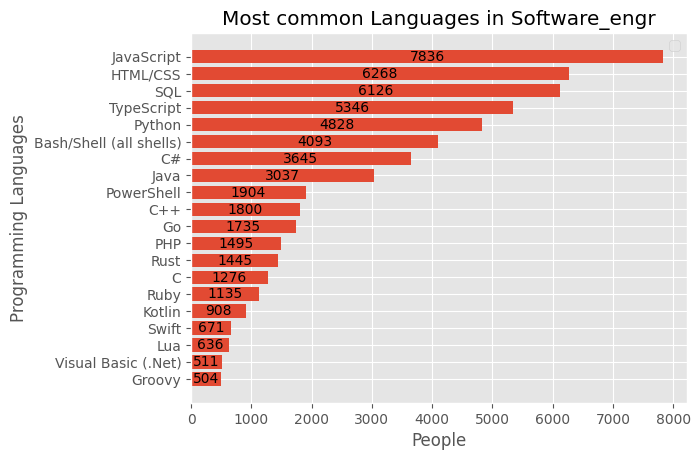

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


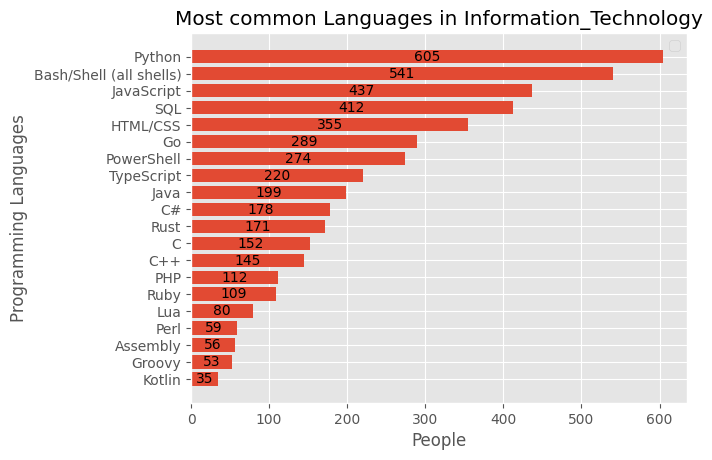

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


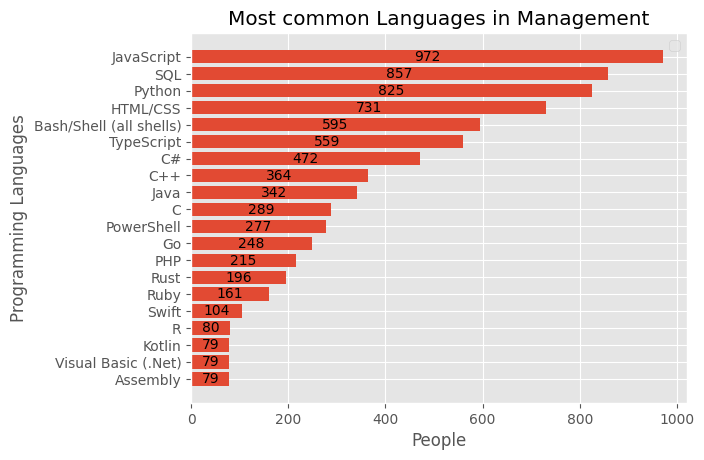

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


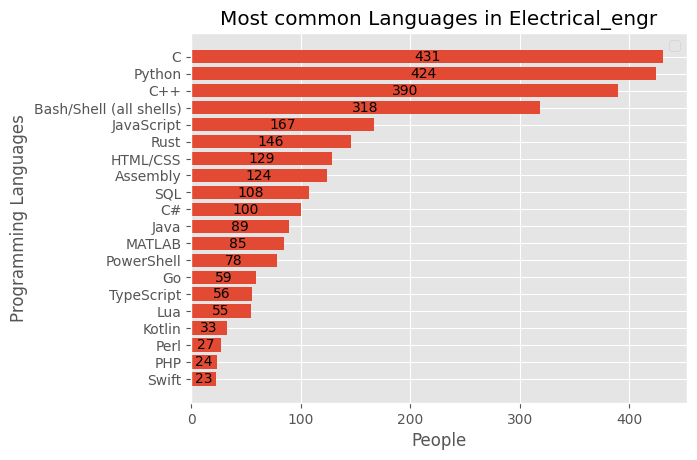

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


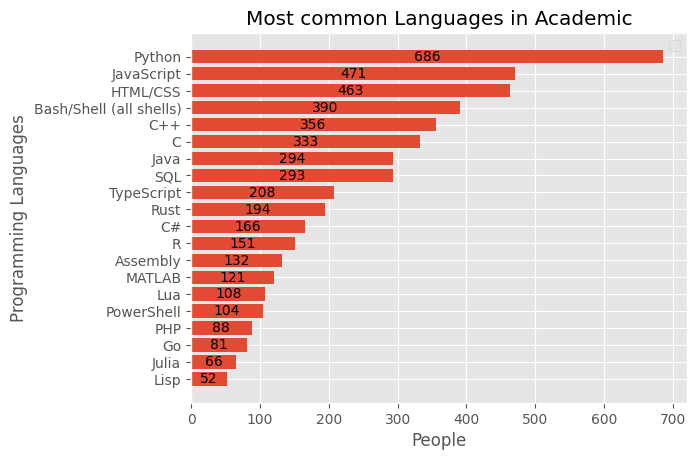

In [23]:
lang_careers(Data_science,'Data_science')
lang_careers(Software_engr,'Software_engr')
lang_careers(Information_Technology,'Information_Technology')
lang_careers(Management,'Management')
lang_careers(Electrical_engr,'Electrical_engr')
lang_careers(Academic,'Academic')


In [66]:
def job_pie(group, name):
    fig, career_pie = plt.subplots(figsize=(10,10))
    job = group['DevType'].value_counts()
    count_ppl = group['DevType'].count()
    career_pie.pie(job, labels= job.index, wedgeprops={'edgecolor': 'black'}, shadow=True, autopct='%.2f%%' , textprops= {'fontsize' : 10})
    career_pie.set_title(f'Relational population, total= {count_ppl} people')
    career_pie.set_xlabel(name)
    

In [51]:
Data_science['DevType'].count()

900

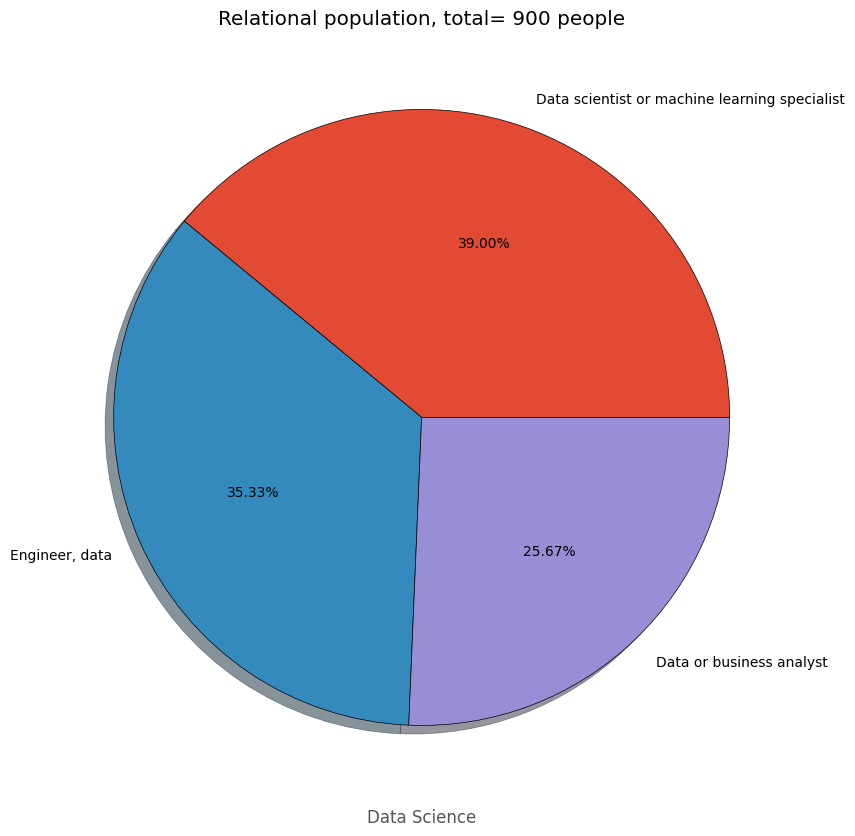

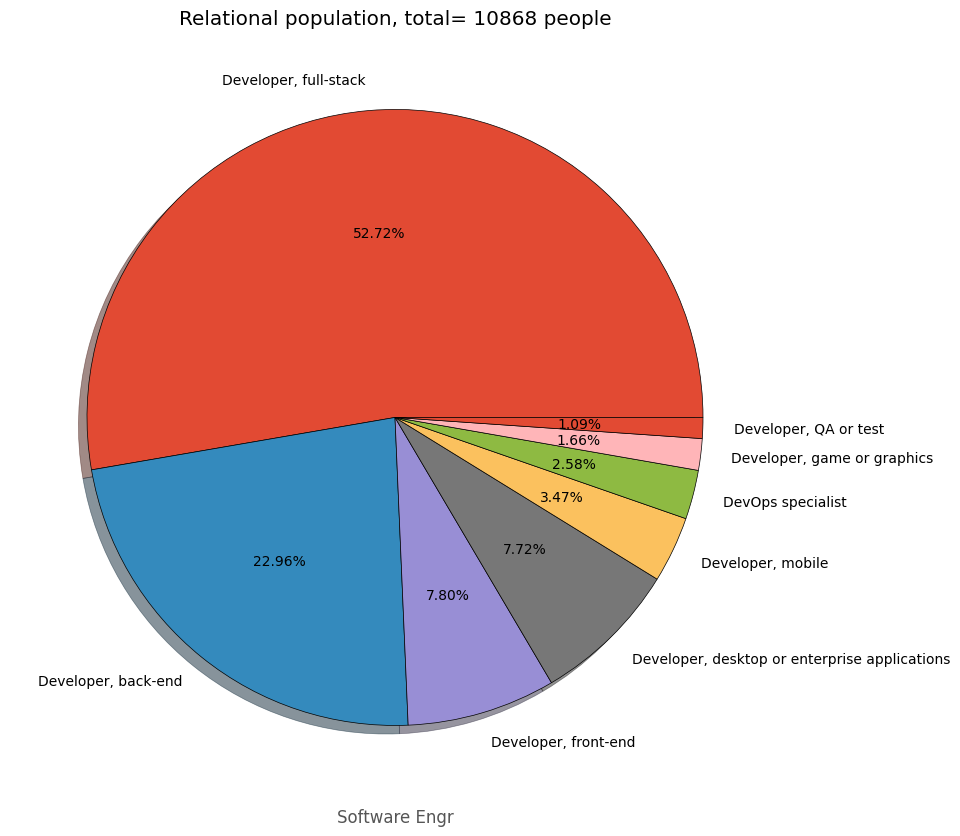

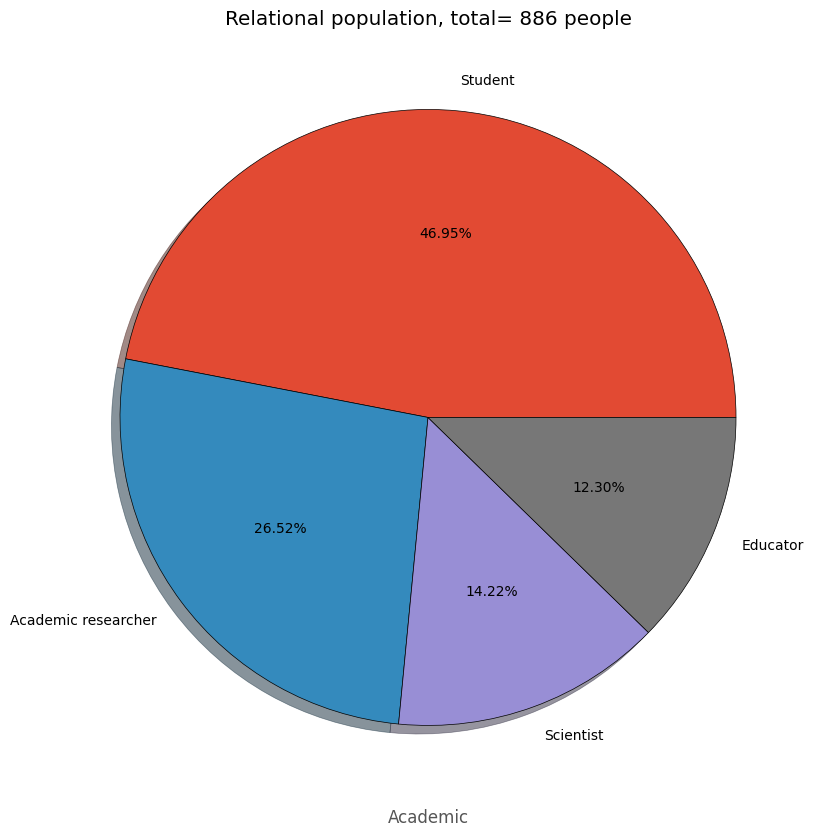

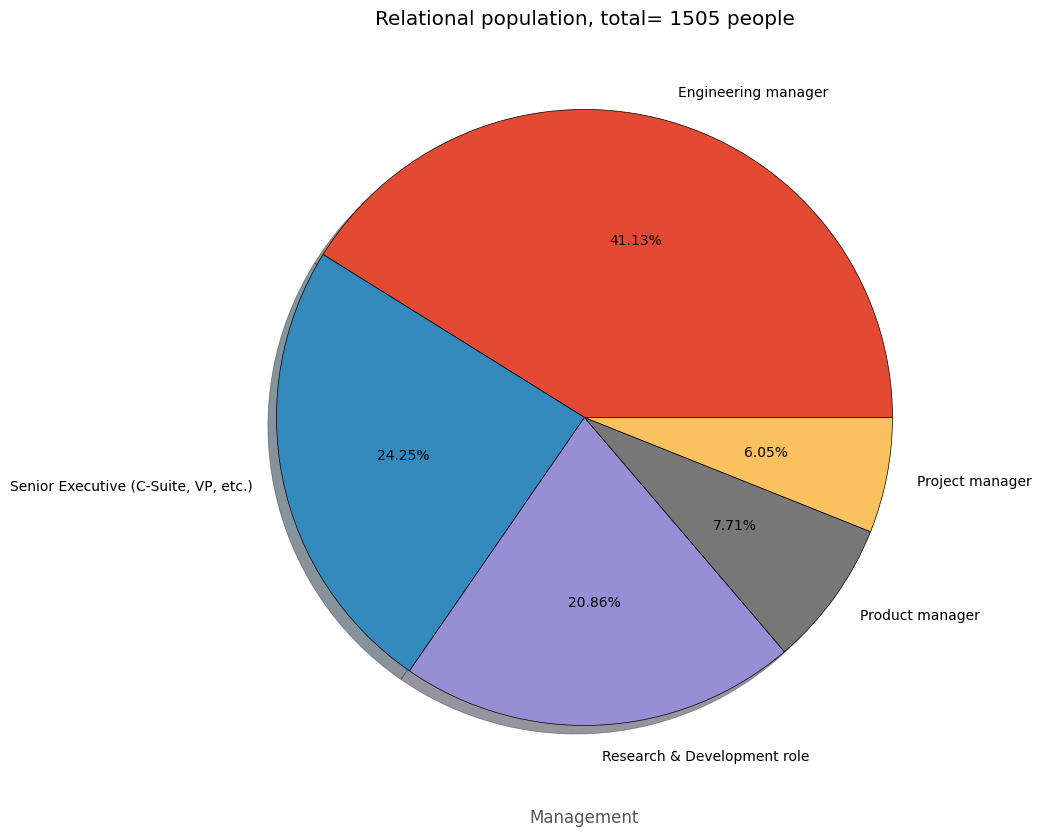

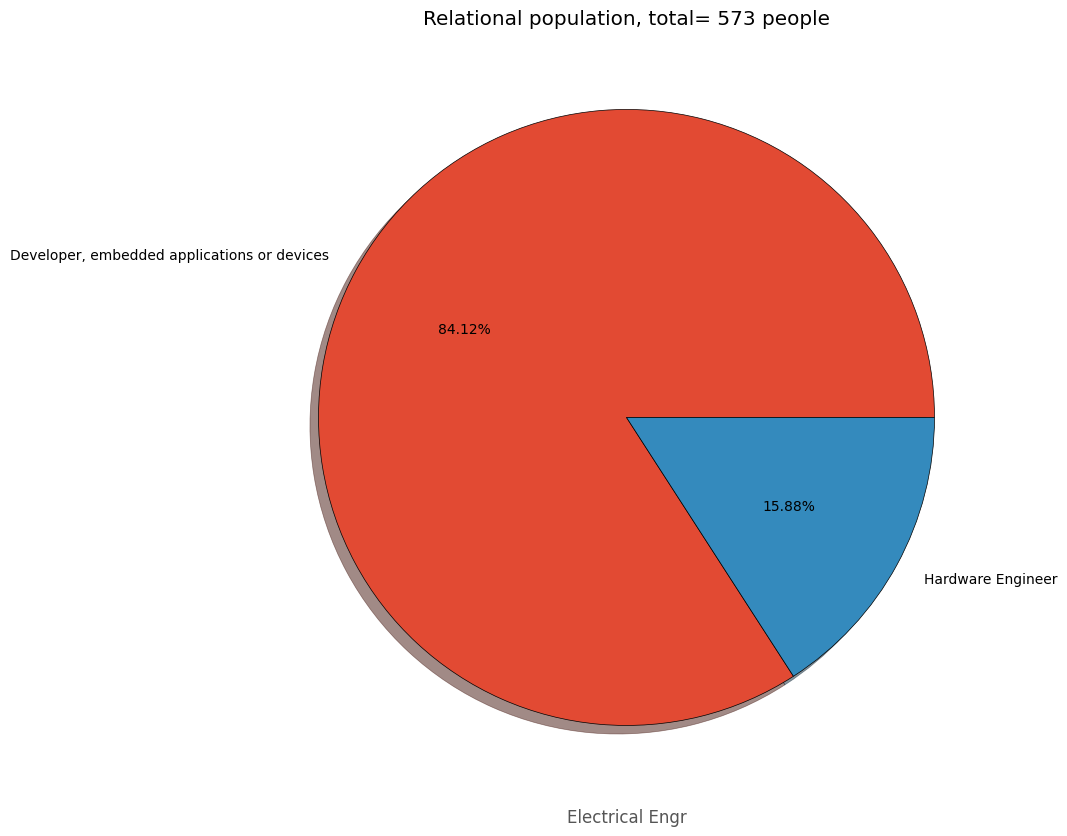

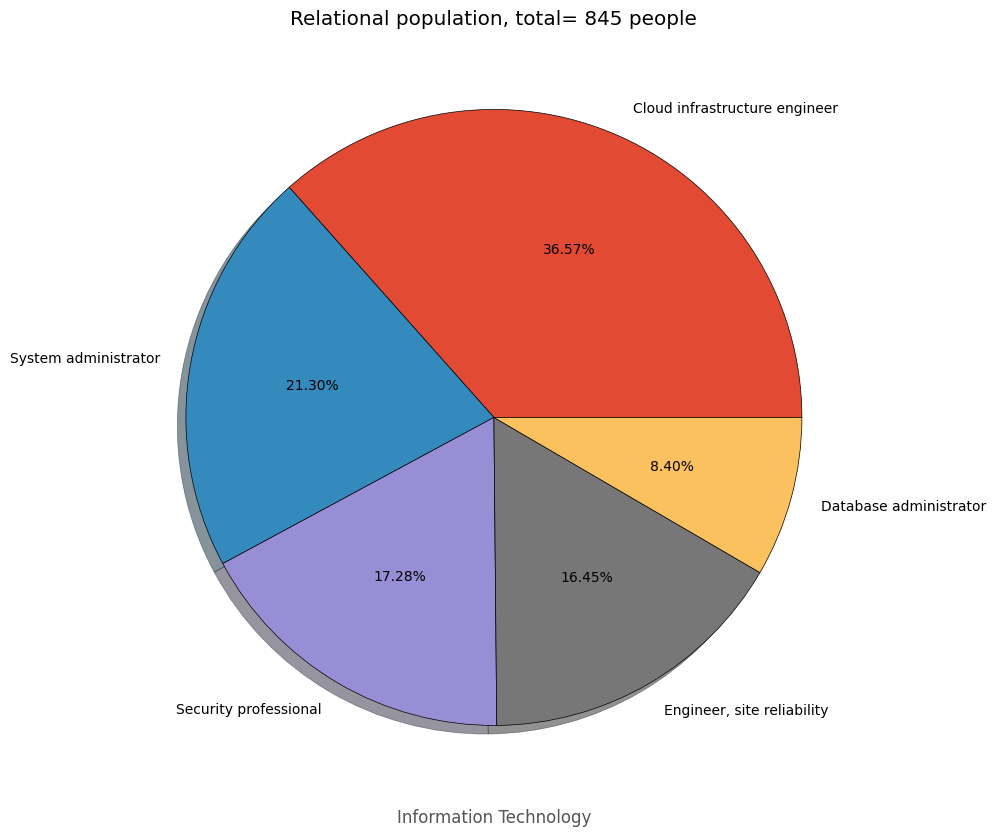

In [67]:
job_pie(Data_science, 'Data Science')
job_pie(Software_engr, 'Software Engr')
job_pie(Academic, 'Academic')
job_pie(Management, 'Management')
job_pie(Electrical_engr, 'Electrical Engr')
job_pie(Information_Technology, 'Information Technology')

In [ ]:
# !jupyter nbconvert <notebook name>.ipynb --to html // converting to html